In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from PIL import Image
import os
from IPython.display import display, clear_output, HTML
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from pathlib import Path
import PIL
import numpy as np
from skimage import io
from skimage.color import rgba2rgb
import imgaug as ia
import imgaug.augmenters as iaa
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
print((1200 // 6616) - 1)

-1


1199


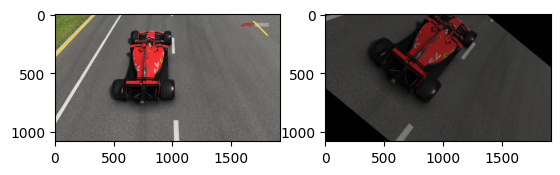

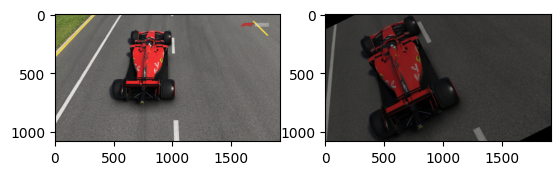

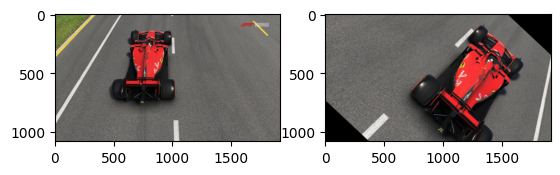

In [ ]:
img = '/content/drive/MyDrive/F1Cars/20200427171309_2.jpg'
# Augment images to increase data size to more than 1000 images per class

# Set the folder path
# team_list = ['AlphaTauri F1 car', 'Ferrari F1 car', 'McLaren F1 car', 
#              'Mercedes F1 car', 'Racing Point F1 car', 'Red Bull Racing F1 car', 
#              'Renault F1 car', 'Williams F1 car']

# for team in team_list:
    

#folder_path = f'Formula One Cars/{team}/'

# Define the augmentation sequence
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flips with 50% probability
    iaa.Affine(rotate=(-45, 45)),  # Rotate images by -45 to 45 degrees
    iaa.Affine(scale=(0.5, 1.5)),  # Scale images by 50% to 150%
    iaa.Multiply((0.5, 1.5)),  # Change brightness (50% to 150%)
    iaa.GaussianBlur(sigma=(0, 2.0))  # Apply Gaussian blur with sigma between 0 and 2
])

# Load the images
images = []
#for file in os.listdir(folder_path):
folder_path = '/content/drive/MyDrive/F1Cars/'
file='20200422160759_3.jpg'
if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
    image_path = os.path.join(folder_path, file)
    image = Image.open(image_path)
    images.append(np.array(image))
print((1200 // len(images)) - 1)
# Number of times to augment each image to reach the desired count
num_augmentations_per_image = 3#(1200 // len(images)) - 1

# Save the augmented images
output_folder = f'/content/drive/MyDrive/F1Cars/augmented_images/'
os.makedirs(output_folder, exist_ok=True)


counter = 0
counter1 = 0
for img in images:
    for i in range(num_augmentations_per_image):
        aug_image = seq(image=img)
        image = Image.fromarray(aug_image)
        image = image.convert("RGB")  # Convert the image to RGB mode
        image.save(os.path.join(output_folder, f'aug_image_{counter}.jpg'))
        counter += 1
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(img)
        ax[1].imshow(image)
        plt.show()
    #save original image
    image_org = Image.fromarray(img)
    image_org = image_org.convert("RGB")  # Convert the image to RGB mode
    image_org.save(os.path.join(output_folder, f'original_image_{counter1}.jpg'))
    counter1 += 1





In [ ]:
img = '/content/drive/MyDrive/F1Cars/20200427191026_1.jpg'
# Augment images to increase data size to more than 1000 images per class

# Set the folder path
# team_list = ['AlphaTauri F1 car', 'Ferrari F1 car', 'McLaren F1 car', 
#              'Mercedes F1 car', 'Racing Point F1 car', 'Red Bull Racing F1 car', 
#              'Renault F1 car', 'Williams F1 car']

# for team in team_list:
    

#folder_path = f'Formula One Cars/{team}/'

# Define the augmentation sequence
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flips with 50% probability
    iaa.Affine(rotate=(-45, 45)),  # Rotate images by -45 to 45 degrees
    iaa.Affine(scale=(0.5, 1.5)),  # Scale images by 50% to 150%
    iaa.Multiply((0.5, 1.5)),  # Change brightness (50% to 150%)
    iaa.GaussianBlur(sigma=(0, 2.0))  # Apply Gaussian blur with sigma between 0 and 2
])

# Load the images
images = []
#for file in os.listdir(folder_path):
folder_path = '/content/drive/MyDrive/F1Cars/'
file='20200427191026_1.jpg'
if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
    image_path = os.path.join(folder_path, file)
    image = Image.open(image_path)
    images.append(np.array(image))

# Number of times to augment each image to reach the desired count
num_augmentations_per_image = 24#(1200 // len(images)) - 1

# Save the augmented images
output_folder = f'/content/drive/MyDrive/F1Cars/augmented_images/'
os.makedirs(output_folder, exist_ok=True)


counter = 0
counter1 = 0
for img in images:
    for i in range(num_augmentations_per_image):
        aug_image = seq(image=img)
        image = Image.fromarray(aug_image)
        image = image.convert("RGB")  # Convert the image to RGB mode
        image.save(os.path.join(output_folder, f'aug_image_{counter}.jpg'))
        counter += 1
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(img)
        ax[1].imshow(image)
        plt.show()
    #save original image
    image_org = Image.fromarray(img)
    image_org = image_org.convert("RGB")  # Convert the image to RGB mode
    image_org.save(os.path.join(output_folder, f'original_image_{counter1}.jpg'))
    counter1 += 1



